<h1 style="font-size:36px;">Convolutional Neural Network(CNN)</h1>

CNN architecture includes several convolutional layers followed by several fully connected layers. A matrix of Bitcoin price data over the time range is used as input. Convolutional layers create feature maps by acting on the input matrix of the filters. Fully connected layers flatten the feature maps and render them into the output layer. When this architecture is used for Bitcoin price prediction, it allows to learn visual features of historical price data and use these features to predict future prices.

CNN mimarisi, birkaç evrişimli katman ve ardından birkaç tam bağlantılı katman içerir. Girdi olarak, zaman aralığındaki Bitcoin fiyat verilerinin bir matrisi kullanılır. Evrişimli katmanlar, filtrelerin girdi matrisi üzerinde hareket ederek özellik haritalarını oluşturur. Tam bağlantılı katmanlar, özellik haritalarını düzleştirir ve çıktı katmanına doğru işler. Bu mimari, Bitcoin fiyat tahmini için kullanıldığında, geçmiş fiyat verilerinin görsel özelliklerini öğrenmeyi ve bu özelliklerin gelecekteki fiyatları tahmin etmek için kullanılmasını sağlar.

Model 1 uses a Conv1D layer with 58 input properties and then halves the size using a MaxPooling1D layer. It then creates an intermediate output using a Dense layer, and finally uses a Dense layer containing a single output neuron, the output layer. Model 1 has 104,761 trainable parameters.

Model 1, 58 adet girdi özelliğine sahip bir Conv1D katmanı kullanır ve ardından bir MaxPooling1D katmanı kullanarak boyutu yarıya indirir. Daha sonra, bir Yoğun katmanı kullanarak bir ara çıktı oluşturur ve son olarak, çıkış katmanı olan tek bir çıktı nöronu içeren bir Yoğun katman kullanır. Model 1, 104,761 eğitilebilir parametreye sahiptir.


<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error
from keras.callbacks import History
import math
import yfinance as yf

In [2]:
# Veri setini yükleyin
btc = pd.read_csv("merged2_data.csv")

# "Close" değişkenini alın
close_btc= btc[['Close', 'Currently']].values


close_btc     

array([[4.57334015e+02, 9.00000000e-02],
       [4.24440002e+02, 9.00000000e-02],
       [3.94795990e+02, 9.00000000e-02],
       ...,
       [2.67840781e+04, 5.08000000e+00],
       [2.69306387e+04, 5.08000000e+00],
       [2.74063906e+04, 5.08000000e+00]])

In [3]:
btc.reset_index(inplace=True)

In [4]:
btc

,index,Date,Close,Currently
0,0,2014-09-17,457.334015,0.09
1,1,2014-09-18,424.440002,0.09
2,2,2014-09-19,394.795990,0.09
3,3,2014-09-20,408.903992,0.09
4,4,2014-09-21,398.821014,0.09
...,...,...,...,...
3158,3158,2023-05-11,27000.789063,5.08
3159,3159,2023-05-12,26804.990234,5.08
3160,3160,2023-05-13,26784.078125,5.08
3161,3161,2023-05-14,26930.638672,5.08


In [5]:

X = []
y = []
inp_num = 60

for i in range(inp_num, len(close_btc)):
    X.append(close_btc[i-inp_num:i])
    y.append(close_btc[i])

X = np.array(X)
y = np.array(y)

In [6]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = np.array(y[:split])
X_test = X[split:]
y_test = np.array(y[split:])

In [7]:
n = X_train.shape[0]  # Örnek sayısı
m = X_train.shape[1]  # Özellik sayısı
k = X_train.shape[2]  # Zaman adımı sayısı


In [8]:


n_train, m_train, k_train = X_train.shape
X_train = X_train.reshape((n_train, m_train * k_train))

n_test, m_test, k_test = X_test.shape
X_test = X_test.reshape((n_test, m_test * k_test))


In [9]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
model = Sequential() 
model.add(Conv1D(filters=128, kernel_size=3, activation = "relu",  input_shape=(120, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 118, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7552)              0         
                                                                 
 dense (Dense)               (None, 60)                453180    
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 453,753
Trainable params: 453,753
Non-trainable params: 0
__________________________________________________

In [12]:

X_train = X_train.reshape((X_train.shape[0], 120, 1))
X_test = X_test.reshape((X_test.shape[0], 120, 1))


In [13]:


hist = History() # Used to record loss per epoch
model.fit(X_train, y_train, epochs=50, batch_size = 32, callbacks=[hist])

Epoch 1/50
78/78 [==============================] - 1s 4ms/step - loss: 117254808.0000
Epoch 2/50
78/78 [==============================] - 0s 4ms/step - loss: 85298096.0000
Epoch 3/50
78/78 [==============================] - 0s 4ms/step - loss: 75772736.0000
Epoch 4/50
78/78 [==============================] - 0s 5ms/step - loss: 74669736.0000
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 73747856.0000
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 73045032.0000
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 72396048.0000
Epoch 8/50
78/78 [==============================] - 0s 4ms/step - loss: 71865064.0000
Epoch 9/50
78/78 [==============================] - 0s 4ms/step - loss: 71228528.0000
Epoch 10/50
78/78 [==============================] - 0s 4ms/step - loss: 70674512.0000
Epoch 11/50
78/78 [==============================] - 0s 5ms/step - loss: 70084640.0000
Epoch 12/50
78/78 [==============================] 

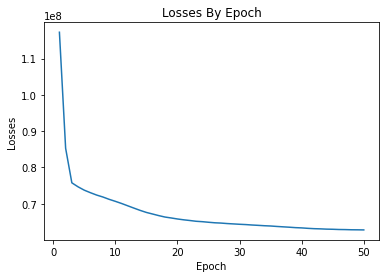

In [14]:
losses = hist.history['loss']
plt.plot(np.arange(1, len(losses) + 1),losses)
plt.title("Losses By Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()

In [15]:
yhat = model.predict(X_test)
yhat = yhat.reshape(yhat.shape[0],)
import numpy as np

yhat_expanded = np.repeat(yhat, y_test.shape[1])

y_test = y_test[:, 0]

mse = mean_squared_error(y_test, yhat)

print("RMSE = " + str(np.sqrt(mse)))


20/20 [==============================] - 0s 2ms/step
RMSE = 18491.30995503748


In [21]:
yhat.shape

(621,)

In [22]:
X_test.shape

(621, 120, 1)

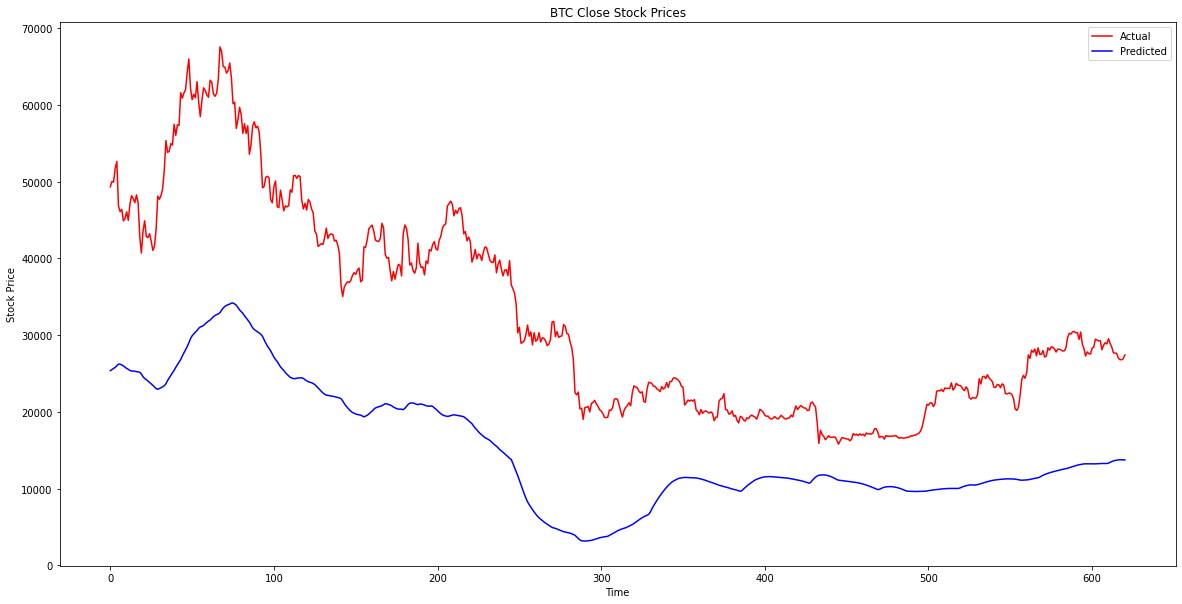

In [16]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="red", label="Actual")
plt.plot(yhat, color = "blue", label = "Predicted")
plt.title("BTC Close Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [17]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MSE = math.sqrt(mean_squared_error(y_test, yhat))
RMSE =np.sqrt(mse)
print(MSE)
print(RMSE)

18491.30995503748
18491.30995503748


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MAE = mean_absolute_error(y_test, yhat)
print('MAE:', MAE)
R2 = r2_score(y_test, yhat)
print('R2:', R2)

MAE: 17047.596635341662
R2: -0.8654803263223483


In [19]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN2_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNN2_ERROR = CNN2_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNN2_ERROR)

         MSE         RMSE          MAE       R2
18491.309955 18491.309955 17047.596635 -0.86548


In [20]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN2_ERROR = pd.DataFrame.from_dict(results, orient='index').T

# Çıktıyı metin dosyasına aktar
output_text = CNN2_ERROR.to_string(index=False)

# Metin dosyasını kaydet
with open('CNN2_ERROR.txt', 'w') as file:
    file.write(output_text)
